## Análise da Rede Viária e Acessibilidade na Região da UFRN em Natal/RN

Neste notebook, realizaremos uma análise da rede viária nas proximidades da Universidade Federal do Rio Grande do Norte (UFRN), focalizando os bairros de Lagoa Nova, Capim Macio, Nova Descoberta e Candelária. O objetivo principal é avaliar a conectividade e a acessibilidade dessas áreas em relação à UFRN, identificando as principais vias de acesso, as rotas mais curtas entre os bairros, e a influência de potenciais alterações na infraestrutura viária. Utilizando a biblioteca OSMnx, construiremos grafos a partir dos dados de rede viária disponíveis, permitindo a aplicação de métricas de centralidade para compreender o papel das diferentes ruas e avenidas na mobilidade urbana local. Esta análise pode fornecer insights valiosos para o planejamento urbano e a melhoria da infraestrutura de transporte na região.

In [1]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 607.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1



### Passos Realizados

1. **Definição dos Bairros e Tipo de Rede**:
   Definimos uma lista contendo os nomes dos bairros de interesse e especificamos que queremos a rede viária para automóveis (`network_type = "drive"`).

2. **Extração da Rede Viária**:
   Utilizamos um loop para iterar sobre cada bairro na lista, baixando a rede viária correspondente e armazenando os grafos em uma lista chamada `grafos`.

3. **Combinação dos Grafos**:
   Após coletar os grafos de todos os bairros, utilizamos a função `nx.compose_all()` para combinar todos os grafos em um único grafo (`G_combined`).

4. **Visualização da Rede**:
   Por fim, plotamos o grafo combinado usando a função `ox.plot_graph()`, ajustando o tamanho dos nós e a largura das arestas para melhor visualização.

A visualização resultante permite observar as interconexões entre os diferentes bairros e pode servir como base para análises mais aprofundadas sobre a mobilidade urbana na região.


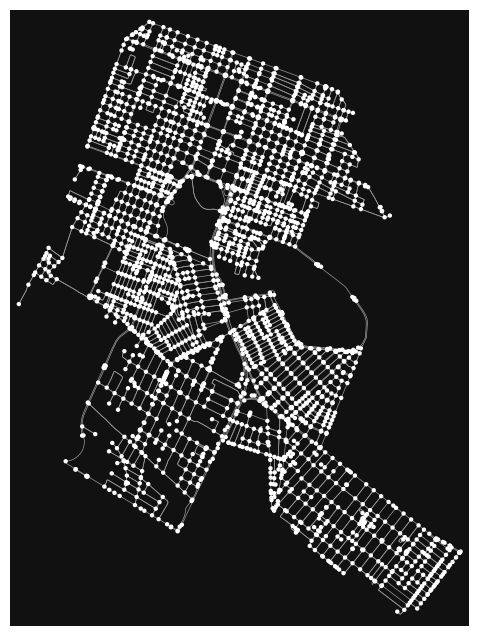

In [9]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define os nomes dos bairros e o tipo de rede
bairros = ["Capim Macio, Natal, Brazil", "Nova Descoberta, Natal, Brazil", "Lagoa Nova, Natal, Brazil", "Candelária, Natal, Brazil", "Nova Descoberta, Natal, Brazil"]
network_type = "drive"

# Inicializa uma lista para armazenar os grafos dos bairros
grafos = []

# Baixa a rede para cada bairro e adiciona à lista
for bairro in bairros:
    G = ox.graph_from_place(bairro, network_type=network_type)
    grafos.append(G)

# Une os grafos dos bairros em um único grafo
G_combined = nx.compose_all(grafos)

# Plota o grafo combinado
fig, ax = ox.plot_graph(G_combined, node_size=10, edge_linewidth=0.5)


### Cálculo e Visualização da Centralidade de Proximidade

Nesta seção, vamos calcular a **centralidade de proximidade** (closeness centrality) para o grafo combinado dos bairros selecionados. A centralidade de proximidade é uma métrica que mede quão rapidamente um nó pode alcançar outros nós na rede, considerando a distância média para todos os outros nós. Essa métrica é útil para identificar nós que estão mais "próximos" de outros, o que pode indicar pontos estratégicos para a mobilidade urbana e acessibilidade.

#### Passos Realizados

1. **Cálculo da Centralidade de Proximidade**:
   Utilizamos a função `nx.closeness_centrality(G_combined)` para calcular a centralidade de proximidade para todos os nós no grafo combinado. O resultado é um dicionário onde as chaves são os nós e os valores correspondem à sua centralidade de proximidade.

2. **Preparação da Visualização**:
   Criamos uma figura e um eixo para plotagem usando `ox.plot_graph()`, configurando o fundo e a largura das arestas. Em seguida, extraímos as coordenadas de cada nó do grafo para o posicionamento no gráfico.

3. **Coloração dos Nós**:
   A coloração dos nós é baseada nos valores de centralidade de proximidade, utilizando um mapa de cores que varia de acordo com a intensidade da centralidade. Isso nos permitirá visualizar quais nós têm maior centralidade de proximidade.

5. **Exibição do Gráfico**:
   Por fim, exibimos o gráfico com a rede viária colorida de acordo com a centralidade de proximidade, permitindo a análise visual dos pontos de maior centralidade na rede.

Essa análise fornece insights sobre a acessibilidade e conectividade da rede viária nos bairros de Natal, identificando possíveis áreas para melhorias na infraestrutura de transporte e mobilidade.


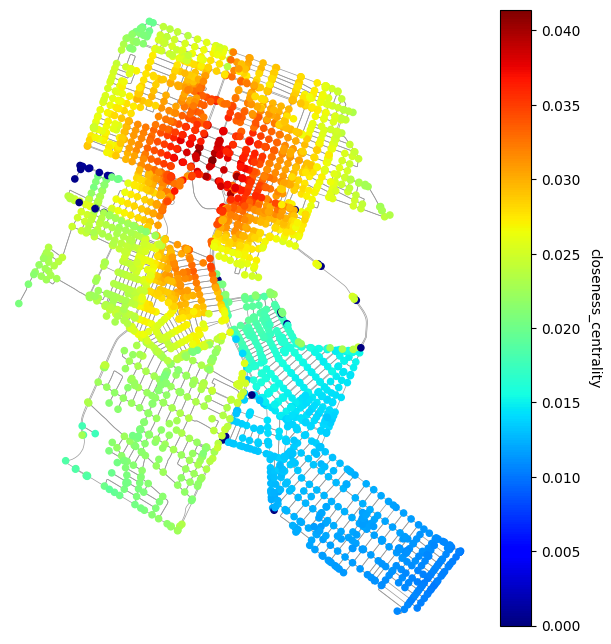

In [11]:
import matplotlib as mpl

closeness_centrality = nx.closeness_centrality(G_combined)

fig, ax = ox.plot_graph(G_combined, bgcolor='white', node_size=0, edge_linewidth=0.5, show=False, close=False)

pos = {node: (data['x'], data['y']) for node, data in G_combined.nodes(data=True)}
node_colors = [closeness_centrality[node] for node in G_combined.nodes()]

nodes = nx.draw_networkx_nodes(
    G_combined, pos=pos, node_color=node_colors, cmap=plt.cm.jet, node_size=20, ax=ax
)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('closeness_centrality', rotation=270, labelpad=15)

plt.show()



É notório que a região com maior closeness centrality está situada no complexo viário próximo ao Arena das Dunas, um importante estádio de futebol em Natal, RN. Essa localização estratégica é resultado da interconexão de várias vias que facilitam o acesso a diferentes partes da cidade, permitindo um fluxo de tráfego mais eficiente.

A proximidade ao Arena das Dunas torna essa região um local privilegiado para a realização de eventos esportivos e culturais, atraindo um grande público. A facilidade de acesso é crucial para o sucesso desses eventos, impactando positivamente o turismo e a economia local.

### Cálculo e Visualização da Centralidade de Intermediação

Nesta seção, vamos calcular a **centralidade de intermediação** (betweenness centrality) para o grafo combinado dos bairros selecionados. A centralidade de intermediação é uma métrica que mede a quantidade de vezes que um nó atua como um "intermediário" em caminhos mais curtos entre outros nós na rede. Esse conceito é crucial para identificar nós que têm um papel estratégico na conectividade da rede, pois eles podem controlar o fluxo de informações ou recursos entre diferentes partes da rede.

#### Passos Realizados

1. **Cálculo da Centralidade de Intermediação**:
   Utilizamos a função `nx.betweenness_centrality(G_combined)` para calcular a centralidade de intermediação para todos os nós no grafo combinado. O resultado é um dicionário onde as chaves são os nós e os valores correspondem à sua centralidade de intermediação.

2. **Preparação da Visualização**:
   Criamos uma figura e um eixo para plotagem usando `ox.plot_graph()`, configurando o fundo e a largura das arestas. Em seguida, extraímos as coordenadas de cada nó do grafo para o posicionamento no gráfico.

3. **Coloração dos Nós**:
   A coloração dos nós é baseada nos valores de centralidade de intermediação, utilizando um mapa de cores que varia de acordo com a intensidade da centralidade. Isso nos permitirá visualizar quais nós desempenham papéis mais críticos na intermediação de conexões entre diferentes partes da rede.

5. **Exibição do Gráfico**:
   Por fim, exibimos o gráfico com a rede viária colorida de acordo com a centralidade de intermediação, permitindo a análise visual dos nós que atuam como intermediários importantes na rede.

Essa análise fornece insights sobre a dinâmica da rede viária nos bairros de Natal, destacando os pontos que podem influenciar a eficiência do tráfego e a comunicação entre diferentes áreas, o que pode ser fundamental para o planejamento urbano e o desenvolvimento de políticas de mobilidade.


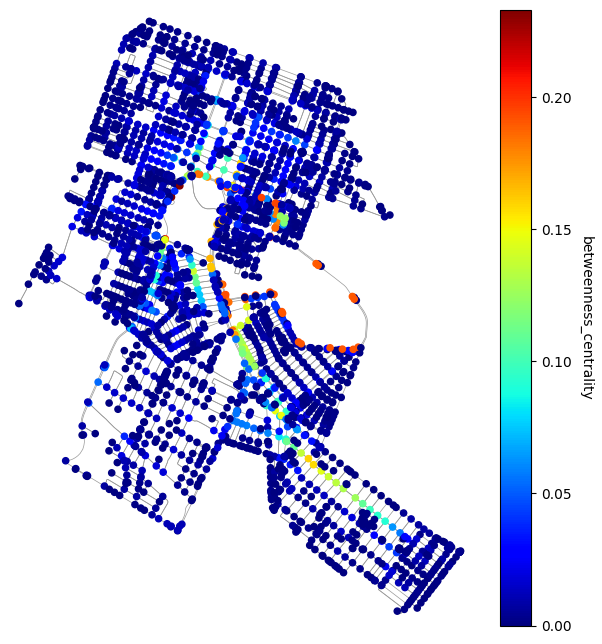

In [12]:
betweenness_centrality = nx.betweenness_centrality(G_combined)

fig, ax = ox.plot_graph(G_combined, bgcolor='white', node_size=0, edge_linewidth=0.5, show=False, close=False)

pos = {node: (data['x'], data['y']) for node, data in G_combined.nodes(data=True)}
node_colors = [betweenness_centrality[node] for node in G_combined.nodes()]

nodes = nx.draw_networkx_nodes(
    G_combined, pos=pos, node_color=node_colors, cmap=plt.cm.jet, node_size=20, ax=ax
)

sm = mpl.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('betweenness_centrality', rotation=270, labelpad=15)

plt.show()



É evidente que a região com os maiores valores de betweenness centrality está localizada ao redor do campus da UFRN e nas proximidades da BR 101. Essa configuração ressalta a importância estratégica dessas áreas na rede viária de Natal, RN.

Os altos valores de betweenness centrality nas áreas ao redor da UFRN e da BR 101 indicam que esses locais atuam como pontos de interseção essenciais na rede viária. Isso significa que muitas rotas que ligam diferentes bairros e regiões da cidade passam por essas áreas, aumentando sua relevância na mobilidade urbana.